# This shows some basic graphing functionality in iPython Notebook

Dan Skorski - June 2015

Areas of interst:
1. Creating basic classes to handle nodes and edges
2. Using networkx and matplotlib to plot a basic graph
3. Using d3 to render a graph within an iPython Notebook

In [1]:
# http://interactivepython.org/LpOMZ/courselib/static/pythonds/Graphs/graphintro.html

# Create the vertex class

class Vertex:
    def __init__(self, key):
        self.id = key
        self.connectedTo = {}
    
    def addNeighbor(self, neighbor, weight=0):
        self.connectedTo[neighbor] = weight
        
    def __str__(self):
        return str(self.id) + ' is connected to ' + str([x for x in self.connectedTo])
    
    def getConnections(self):
        return self.connectedTo.keys()
    
    def getId(self):
        return self.id
    
    def getWeight(self, neighbor):
        return self.connectedTo[neighbor]

In [2]:
class Graph:
    def __init__(self):
        self.vertList = {}
        self.numVerticies = 0
        
    def addVertex(self,key):
        self.numVerticies = self.numVerticies + 1
        newVertex = Vertex(key)
        self.vertList[key] = newVertex
        return newVertex
        
    def getVertex(self,n):
        if n in self.vertList:
            return self.vertList[n]
        else:
            return None
        
    def __contains__(self,n):
        return self.vertList[n]

    def addEdge(self,f,t,cost=0):
        if f not in self.vertList:
            self.addVertex(f)
        if t not in self.vertList:
            self.addVertex(t)
        self.vertList[f].addNeighbor(t,cost)

    def getVertices(self):
        return self.vertList.keys()
            
    def __iter__(self):
        return iter(self.vertList.values())


In [3]:
g = Graph()

In [4]:
for i in range(6):
    g.addVertex(i)

In [5]:
g.vertList

{0: <__main__.Vertex instance at 0x103e95758>,
 1: <__main__.Vertex instance at 0x1042bbdd0>,
 2: <__main__.Vertex instance at 0x1042bbf80>,
 3: <__main__.Vertex instance at 0x1042bbc68>,
 4: <__main__.Vertex instance at 0x1042c3320>,
 5: <__main__.Vertex instance at 0x1042c32d8>}

In [6]:
import random
for i in range(8):
    g.addEdge(random.randint(1,6),random.randint(1,6),random.randint(1,100))

In [7]:
for v in g:
    for w in v.getConnections():
        print("( %s , %s )" % (v.getId(), w))

( 1 , 4 )
( 2 , 1 )
( 3 , 2 )
( 3 , 3 )
( 4 , 4 )
( 5 , 5 )
( 6 , 3 )
( 6 , 6 )


In [8]:
v.getConnections()

[3, 6]

In [9]:
print v


6 is connected to [3, 6]


In [10]:
print v.connectedTo


{3: 97, 6: 21}


In [2]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(graph):
    
    nodes = set([n1 for n1, n2 in graph] + [n2 for n1, n2 in graph])
    
    # create networkx graph
    G=nx.Graph()

    # add nodes
    for node in nodes:
        G.add_node(node)

    # add edges
    for edge in graph:
        G.add_edge(edge[0], edge[1])

    # draw graph
    pos = nx.shell_layout(G)
    nx.draw(G, pos)

    # show graph
    plt.show()


In [8]:
# draw example
testGraph = [(20, 21),(21, 22),(22, 23), (23, 24),(24, 25), (25, 20)]


In [9]:
testGraph

[(20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 20)]

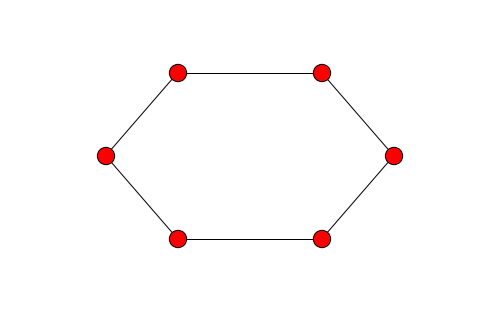

In [11]:
draw_graph(testGraph)

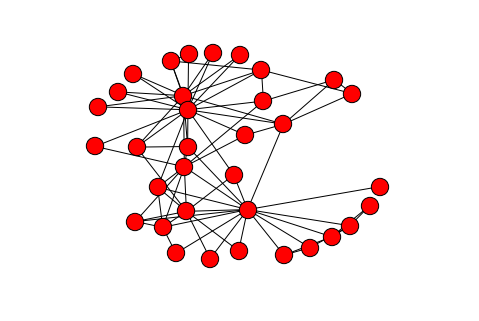

In [23]:
# Need the inline notation to tell iPython notebook to display the graph
%matplotlib inline
g = nx.karate_club_graph()
plt.figure(figsize=(6,4));
nx.draw(g)

In [18]:
import json
from networkx.readwrite import json_graph
data = json_graph.node_link_data(g)
with open('graph.json', 'w') as f:
    json.dump(data, f, indent=4)

In [19]:
head(data)

{'directed': False,
 'graph': [('name', "Zachary's Karate Club")],
 'links': [{'source': 0, 'target': 1},
  {'source': 0, 'target': 2},
  {'source': 0, 'target': 3},
  {'source': 0, 'target': 4},
  {'source': 0, 'target': 5},
  {'source': 0, 'target': 6},
  {'source': 0, 'target': 7},
  {'source': 0, 'target': 8},
  {'source': 0, 'target': 10},
  {'source': 0, 'target': 11},
  {'source': 0, 'target': 12},
  {'source': 0, 'target': 13},
  {'source': 0, 'target': 17},
  {'source': 0, 'target': 19},
  {'source': 0, 'target': 21},
  {'source': 0, 'target': 31},
  {'source': 1, 'target': 2},
  {'source': 1, 'target': 3},
  {'source': 1, 'target': 7},
  {'source': 1, 'target': 13},
  {'source': 1, 'target': 17},
  {'source': 1, 'target': 19},
  {'source': 1, 'target': 21},
  {'source': 1, 'target': 30},
  {'source': 2, 'target': 3},
  {'source': 2, 'target': 32},
  {'source': 2, 'target': 7},
  {'source': 2, 'target': 8},
  {'source': 2, 'target': 9},
  {'source': 2, 'target': 13},
  {'sourc

In [24]:
# for the d3 portion, we create the div and then fill it in later.
# source: http://nbviewer.ipython.org/github/ipython-books/cookbook-code/blob/v2.0/notebooks/chapter06_viz/04_d3.ipynb 

%%html
<div id="d3-example"></div>
<style>
.node {stroke: #fff; stroke-width: 1.5px;}
.link {stroke: #999; stroke-opacity: .6;}
</style>

In [25]:
# code that will fill in the div that is shown above

%%javascript
// We load the d3.js library from the Web.
require.config({paths: {d3: "http://d3js.org/d3.v3.min"}});
require(["d3"], function(d3) {
    // The code in this block is executed when the 
    // d3.js library has been loaded.
    
    // First, we specify the size of the canvas containing
    // the visualization (size of the <div> element).
    var width = 800,
        height = 300;

    // We create a color scale.
    var color = d3.scale.category10();

    // We create a force-directed dynamic graph layout.
    var force = d3.layout.force()
        .charge(-120)
        .linkDistance(30)
        .size([width, height]);

    // In the <div> element, we create a <svg> graphic
    // that will contain our interactive visualization.
    var svg = d3.select("#d3-example").select("svg")
    if (svg.empty()) {
        svg = d3.select("#d3-example").append("svg")
                    .attr("width", width)
                    .attr("height", height);
    }
        
    // We load the JSON file.
    d3.json("graph.json", function(error, graph) {
        // In this block, the file has been loaded
        // and the 'graph' object contains our graph.
        
        // We load the nodes and links in the force-directed
        // graph.
        force.nodes(graph.nodes)
            .links(graph.links)
            .start();

        // We create a <line> SVG element for each link
        // in the graph.
        var link = svg.selectAll(".link")
            .data(graph.links)
            .enter().append("line")
            .attr("class", "link");

        // We create a <circle> SVG element for each node
        // in the graph, and we specify a few attributes.
        var node = svg.selectAll(".node")
            .data(graph.nodes)
            .enter().append("circle")
            .attr("class", "node")
            .attr("r", 5)  // radius
            .style("fill", function(d) {
                // The node color depends on the club.
                return color(d.club); 
            })
            .call(force.drag);

        // The name of each node is the node number.
        node.append("title")
            .text(function(d) { return d.id; });

        // We bind the positions of the SVG elements
        // to the positions of the dynamic force-directed graph,
        // at each time step.
        force.on("tick", function() {
            link.attr("x1", function(d) { return d.source.x; })
                .attr("y1", function(d) { return d.source.y; })
                .attr("x2", function(d) { return d.target.x; })
                .attr("y2", function(d) { return d.target.y; });

            node.attr("cx", function(d) { return d.x; })
                .attr("cy", function(d) { return d.y; });
        });
    });
});


<IPython.core.display.Javascript object>